## LGMVIP January Data Science Internship task 3 - Music Recommendation


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
train = pd.read_csv('/content/train.csv')
songs = pd.read_csv('/content/songs.csv')
members = pd.read_csv('/content/members.csv')

In [5]:
train.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1.0
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1.0
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1.0
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1.0
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1.0


In [6]:
songs.head()

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31.0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52.0


In [7]:
members.head()

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,20110820,20170920
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,20150628,20170622
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,20160411,20170712
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,20150906,20150907
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,20170126,20170613


In [8]:
# check basic info of data
train.info()
songs.info()
members.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117286 entries, 0 to 117285
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   msno                117286 non-null  object 
 1   song_id             117286 non-null  object 
 2   source_system_tab   116933 non-null  object 
 3   source_screen_name  112171 non-null  object 
 4   source_type         117046 non-null  object 
 5   target              117285 non-null  float64
dtypes: float64(1), object(5)
memory usage: 5.4+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159047 entries, 0 to 159046
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   song_id      159047 non-null  object 
 1   song_length  159047 non-null  int64  
 2   genre_ids    155632 non-null  object 
 3   artist_name  159047 non-null  object 
 4   composer     91227 non-null   object 
 5   lyricist     40744 non

In [9]:
train.describe()

,target
count,117285.000000
mean,0.750224
std,0.432885
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,1.000000


In [10]:
# get statistical summaries of dataset
songs.describe()

,song_length,language
count,1.590470e+05,159046.000000
mean,2.470199e+05,27.196648
std,1.362665e+05,23.517848
min,1.253000e+03,-1.000000
25%,1.980600e+05,3.000000
50%,2.329420e+05,24.000000
75%,2.735300e+05,52.000000
max,6.448901e+06,59.000000


In [11]:
members.describe()

,city,bd,registered_via,registration_init_time,expiration_date
count,34403.000000,34403.000000,34403.000000,3.440300e+04,3.440300e+04
mean,5.371276,12.280935,5.953376,2.013994e+07,2.016901e+07
std,6.243929,18.170251,2.287534,2.954015e+04,7.320925e+03
min,1.000000,-43.000000,3.000000,2.004033e+07,1.970010e+07
25%,1.000000,0.000000,4.000000,2.012103e+07,2.017020e+07
50%,1.000000,0.000000,7.000000,2.015090e+07,2.017091e+07
75%,10.000000,25.000000,9.000000,2.016110e+07,2.017093e+07
max,22.000000,1051.000000,16.000000,2.017023e+07,2.020102e+07


In [12]:
train.shape

(117286, 6)

In [13]:
songs.shape

(159047, 7)

In [14]:
members.shape

(34403, 7)

## Data Visualization

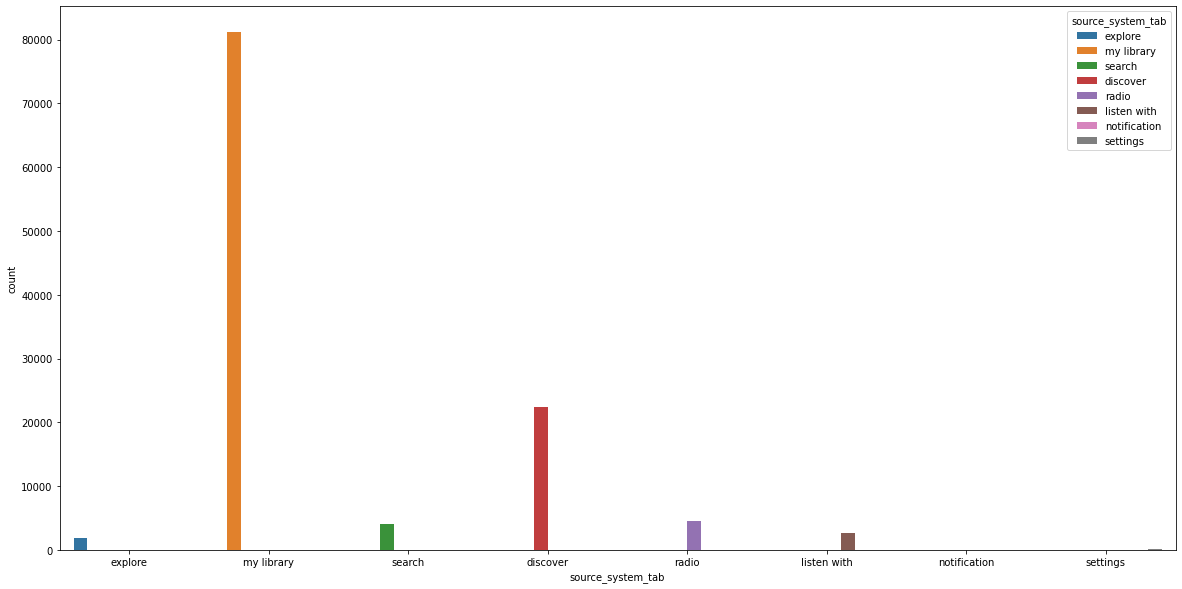

In [15]:
plt.figure(figsize=(20,10))
sns.countplot(x='source_system_tab', hue='source_system_tab', data=train)

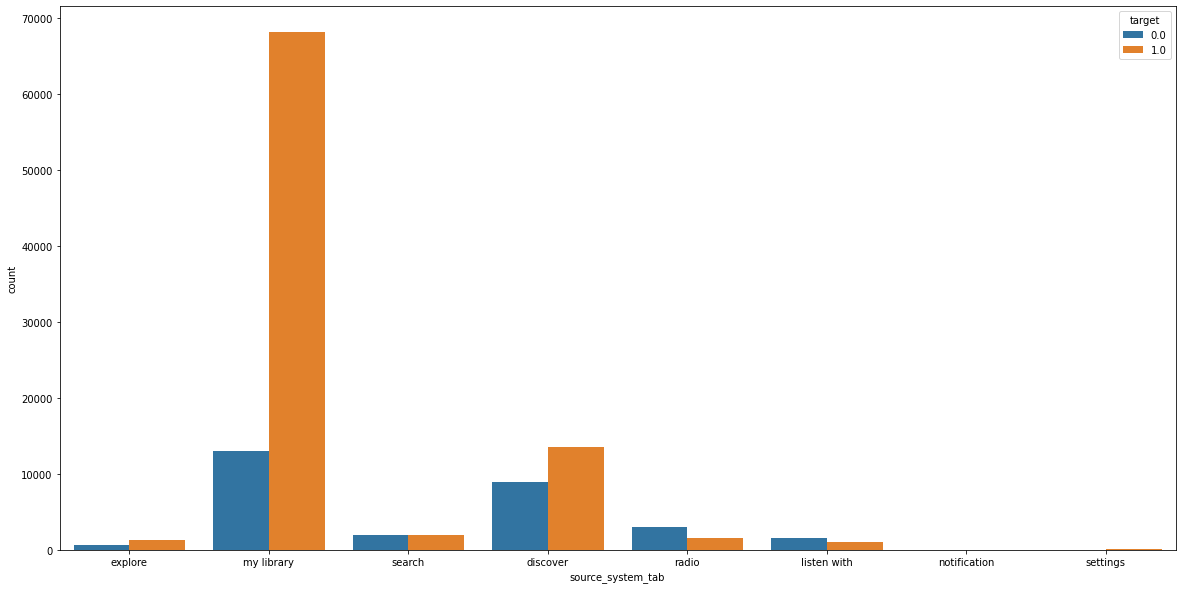

In [16]:
plt.figure(figsize=(20,10))
sns.countplot(x='source_system_tab', hue='target', data=train)

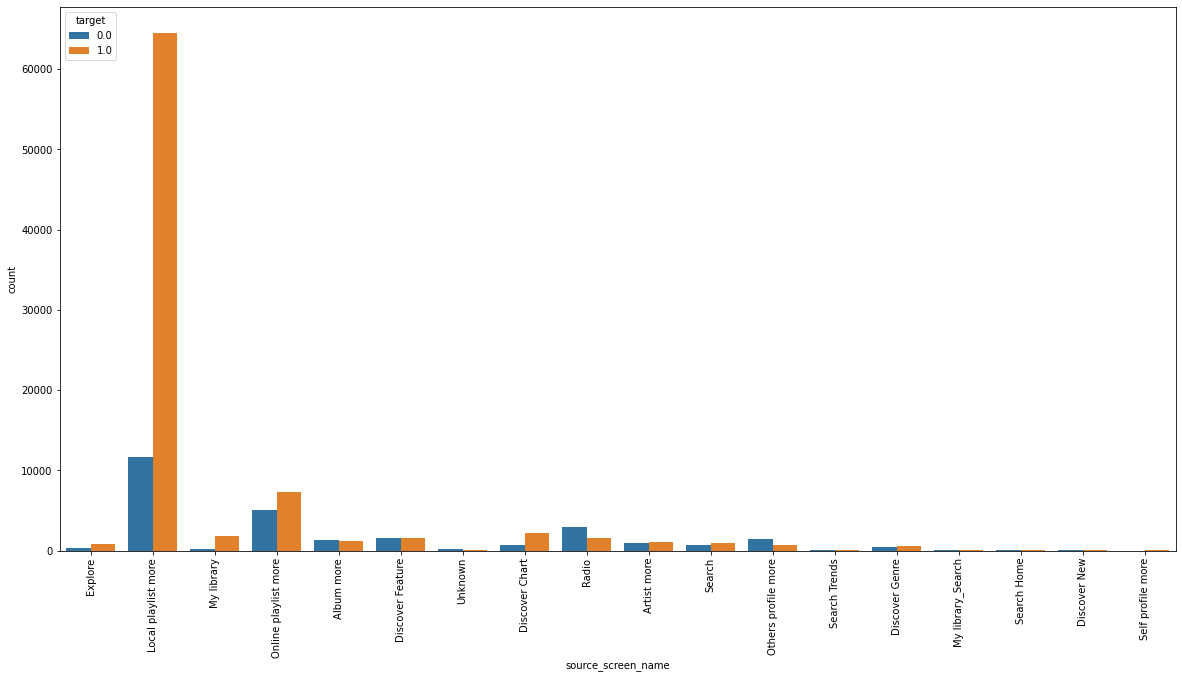

In [17]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
sns.countplot(x='source_screen_name', hue='target',data=train)

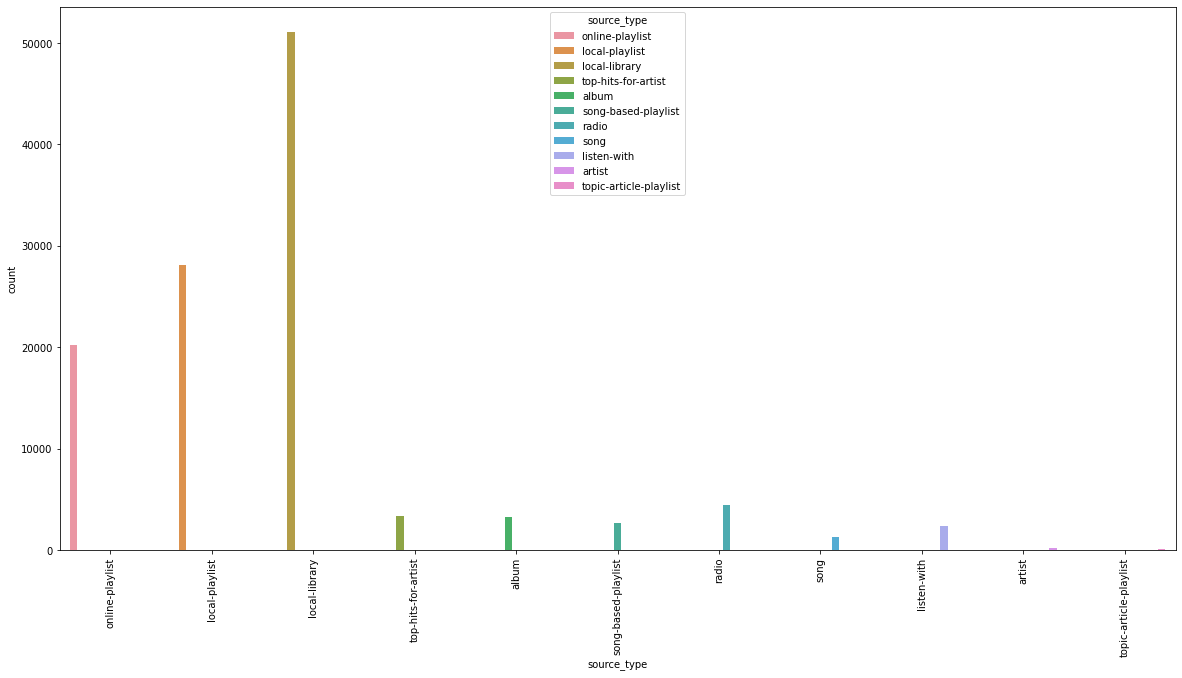

In [18]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
sns.countplot(x='source_type', hue='source_type',data=train)

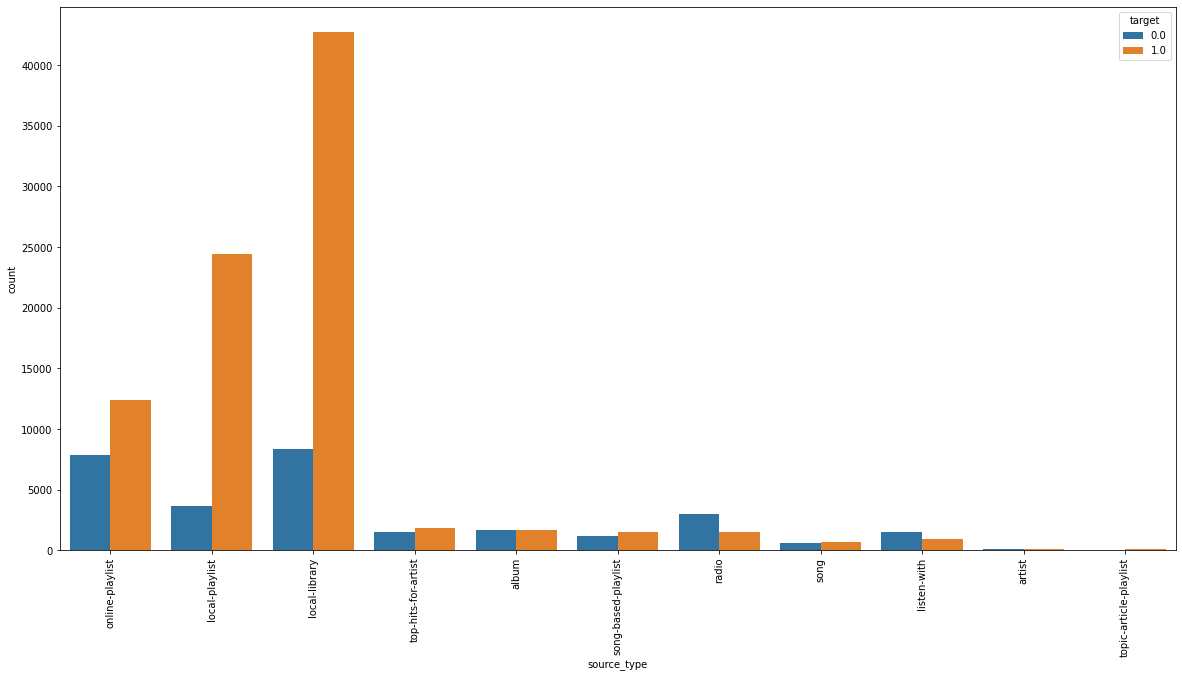

In [19]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=90)
sns.countplot(x='source_type', hue='target',data=train)

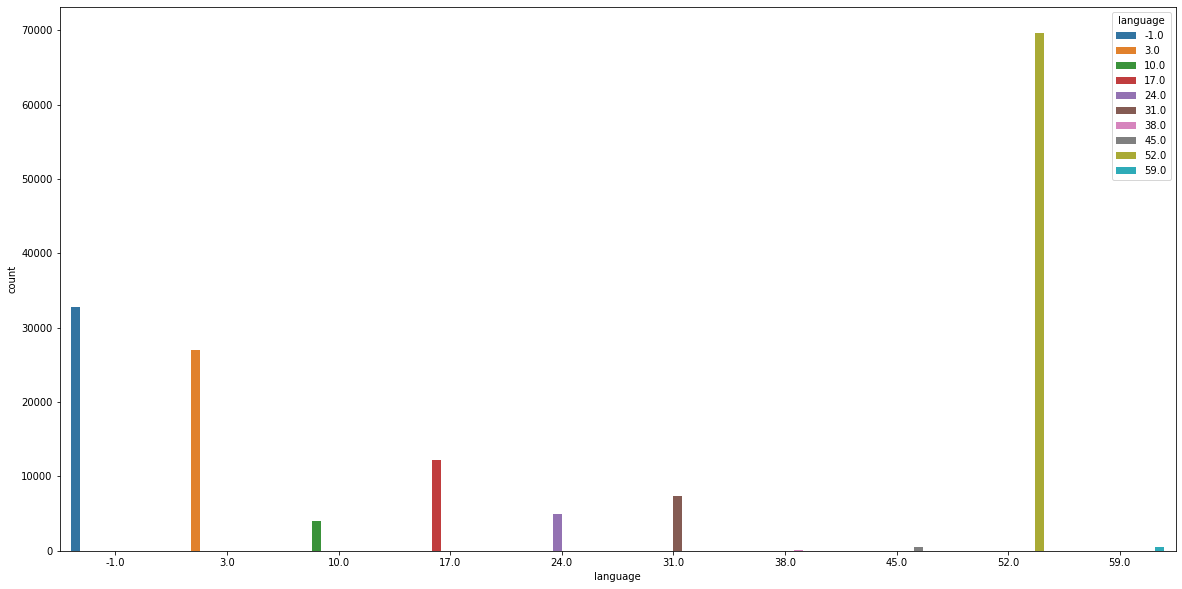

In [20]:
plt.figure(figsize=(20,10))
sns.countplot(x='language', hue='language',data=songs)

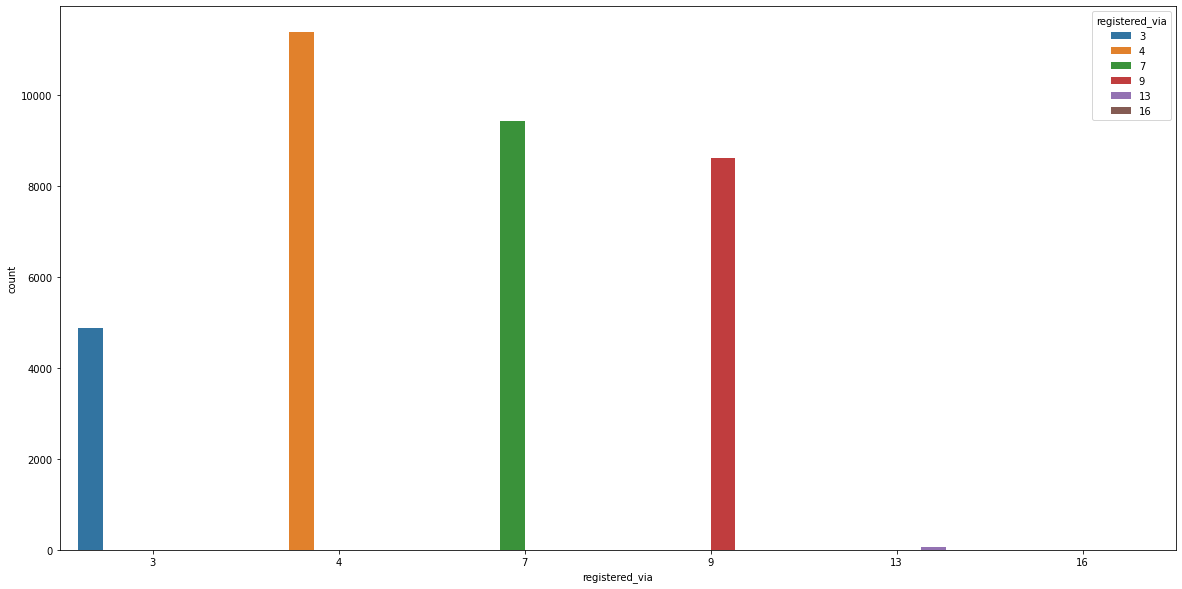

In [21]:
plt.figure(figsize=(20,10))
sns.countplot(x='registered_via', hue='registered_via',data=members)

## Data Cleaning

In [23]:
ntr = 7000
nts = 3000
names=['msno','song_id','source_system_tab','source_screen_name','source_type','target']
test1 = pd.read_csv('/content/train.csv',names=names,skiprows=ntr,nrows=nts)

In [24]:
test = test1.drop(['target'],axis=1)
ytr = np.array(test1['target'])

In [25]:
test_name = ['id','msno','song_id','source_system_tab','source_screen_name','source_type']
test['id']=np.arange(nts)
test = test[test_name]

In [26]:
song_cols = ['song_id', 'artist_name', 'genre_ids', 'song_length', 'language']
train = train.merge(songs[song_cols], on='song_id', how='left')
test = test.merge(songs[song_cols], on='song_id', how='left')

In [27]:
members['registration_year'] = members['registration_init_time'].apply(lambda x: int(str(x)[0:4]))
members['registration_month'] = members['registration_init_time'].apply(lambda x: int(str(x)[4:6]))
members['registration_date'] = members['registration_init_time'].apply(lambda x: int(str(x)[6:8]))

In [28]:
members['expiration_year'] = members['expiration_date'].apply(lambda x: int(str(x)[0:4]))
members['expiration_month'] = members['expiration_date'].apply(lambda x: int(str(x)[4:6]))
members['expiration_date'] = members['expiration_date'].apply(lambda x: int(str(x)[6:8]))
members = members.drop(['registration_init_time'], axis=1)

In [29]:
members_cols = members.columns
train = train.merge(members[members_cols], on='msno', how='left')
test = test.merge(members[members_cols], on='msno', how='left')

In [30]:
train = train.fillna(-1)
test = test.fillna(-1)

In [31]:
import gc
del members, songs; gc.collect();

In [32]:
cols = list(train.columns)
cols.remove('target')

In [33]:
from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder
for col in tqdm(cols):
    if train[col].dtype == 'object':
        train[col] = train[col].apply(str)
        test[col] = test[col].apply(str)

        le = LabelEncoder()
        train_vals = list(train[col].unique())
        test_vals = list(test[col].unique())
        le.fit(train_vals + test_vals)
        train[col] = le.transform(train[col])
        test[col] = le.transform(test[col])

100%|██████████| 19/19 [00:00<00:00, 29.56it/s]


In [34]:
unique_songs = range(max(train['song_id'].max(), test['song_id'].max()))
song_popularity = pd.DataFrame({'song_id': unique_songs, 'popularity':0})
train_sorted = train.sort_values('song_id')
train_sorted.reset_index(drop=True, inplace=True)
test_sorted = test.sort_values('song_id')
test_sorted.reset_index(drop=True, inplace=True)

## Building the Model

In [35]:
pip install lightgbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [36]:
from sklearn.model_selection import train_test_split
import lightgbm as lgb
X = np.array(train.drop(['target'], axis=1))
y = train['target'].values

X_test = np.array(test.drop(['id'], axis=1))
ids = test['id'].values

del train, test; gc.collect();

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.1, random_state = 12)
    
del X, y; gc.collect();

d_train = lgb.Dataset(X_train, label=y_train)
d_valid = lgb.Dataset(X_valid, label=y_valid) 

watchlist = [d_train, d_valid]

In [37]:
def predict(m1_model):
    model = m1_model.fit(X_train,y_train)
    print('Training Score : {}'.format(model.score(X_train,y_train)))
    y_pred = model.predict(X_valid)
    v_test = model.predict(X_test)
    yhat = (v_test>0.5).astype(int)
    comp = (yhat==ytr).astype(int)
    acc = comp.sum()/comp.size*100
    print("Accuracy on test data for the model", acc)

In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
predict(LogisticRegression())

Training Score : 0.7506655172087119
Accuracy on test data for the model 74.9
